In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from math import dist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#directory = '/Volumes/My Passport/Macbook_Documents_29052024/UNIVERSITY/Maastricht/git/OpenPoseDataTranslated/'
directory = '/Users/vojtasmekal/Documents/OpenPoseDataTranslated/'
os.chdir(directory)
stimuli = [name for name in os.listdir() if os.path.isdir(name)]

#### Head-groin distance calculation

In [3]:
selection = stimuli[6]
display(selection)

all_files = glob.glob(directory + selection + "/*.xlsx")
all_files.sort()

df_current = pd.read_excel(all_files[0], header=None)

head = (df_current.iloc[0][0], df_current.iloc[0][1])
groin = (df_current.iloc[8][0], df_current.iloc[8][1])

headGroinDistance = dist(head,groin)
display(headGroinDistance)

'E1_M8_4_flip'

163.189766449983

#### Vector collation

In [3]:
vectors = pd.DataFrame()

for stimulus in stimuli:
    all_files = glob.glob(directory + stimulus + "/*.xlsx")
    all_files.sort()
    action = str(stimulus)[0:2]
    actor = str(stimulus)[3:6]
    
    for file in all_files:
        df_current = pd.read_excel(file, header=None)
        df_current = df_current.reset_index()
        
        distances = []
        
        origin = ((df_current.iloc[8][0] - df_current.iloc[1][0]), (df_current.iloc[8][1] - df_current.iloc[1][1]))
        
        for index, row in df_current.iterrows():
            point = (df_current.iloc[index][0], df_current.iloc[index][1])
            vector_distance = dist(point, origin)
            distances.append(vector_distance)
            
        array = np.asarray(distances)
        df_current[2] = array.tolist()
        df_current = df_current.drop(df_current.columns[[0, 1, 2]], axis=1)
        df_current.loc[len(df_current.index)] = [action]
        df_current.loc[len(df_current.index)] = [actor]
        
        vectors = pd.concat([vectors, df_current], axis=1, ignore_index=True)
        
vectors = vectors.T
vectors.columns = ['head', 'sternum', 'rightShoulder', 'rightElbow', 'rightHand', 'leftShoulder', 'leftElbow',
                   'leftHand', 'groin', 'rightHip', 'rightKnee', 'rightAnkle', 'leftHip', 'leftKnee', 'leftAnkle',
                   'rightEye', 'leftEye', 'rightEar', 'leftEar', 'leftToe', 'leftPinky', 'leftHeel', 'rightToe',
                   'rightPinky', 'rightHeel', 'action', 'actor']

vectors = vectors.drop(['rightEye', 'leftEye', 'rightEar', 'leftEar'], axis=1)

display(vectors)

,head,sternum,rightShoulder,rightElbow,rightHand,leftShoulder,leftElbow,leftHand,groin,rightHip,...,leftKnee,leftAnkle,leftToe,leftPinky,leftHeel,rightToe,rightPinky,rightHeel,action,actor
0,375.25287,374.903719,365.237044,408.391258,475.798478,394.820762,417.913778,462.545085,424.264069,421.228552,...,500.443205,497.225052,517.410755,527.729494,493.967608,483.93963,483.27459,470.942763,N4,M9_
1,375.25287,374.903719,365.237044,408.391258,475.798478,394.820762,417.913778,462.545085,424.264069,421.228552,...,500.443205,497.225052,517.410755,527.729494,493.967608,483.93963,483.27459,470.942763,N4,M9_
2,375.25287,374.903719,365.237044,408.391258,475.798478,394.820762,417.913778,462.545085,424.264069,421.228552,...,500.443205,497.225052,517.410755,527.729494,493.967608,483.93963,483.27459,470.942763,N4,M9_
3,379.322992,374.903719,365.237044,408.391258,475.798478,394.820762,417.913778,466.210787,424.264069,421.228552,...,500.443205,497.225052,517.410755,527.729494,493.967608,483.93963,483.27459,470.942763,N4,M9_
4,375.25287,374.903719,365.237044,408.391258,475.798478,394.820762,417.913778,462.545085,424.264069,421.228552,...,500.443205,497.225052,517.410755,527.729494,493.967608,483.93963,483.27459,470.942763,N4,M9_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,373.275435,356.186708,337.792731,374.494298,448.15986,381.007905,417.553548,444.573099,416.231084,401.811967,...,507.991695,572.467989,603.479243,615.155491,580.759673,570.309977,563.278195,565.441713,N1,M8_
1767,374.704455,357.509057,340.31893,376.568501,451.89709,380.657969,416.327192,446.067944,416.184732,406.462248,...,508.507292,572.704422,607.444892,614.889625,582.249196,573.366321,565.240499,564.984552,N1,M8_
1768,375.13208,358.805697,340.88138,376.627897,449.091849,380.633249,417.076655,445.251286,418.067629,405.022944,...,509.470049,572.211309,607.505919,616.44408,582.124472,574.345362,565.567404,566.564462,N1,M8_
1769,369.359198,354.541482,337.926009,376.114024,443.581165,378.395479,413.70908,442.049558,416.197602,404.359597,...,504.781691,569.591586,602.621107,612.137313,579.912916,569.481809,559.721752,565.118044,N1,M8_


#### Normalize for actor height

In [4]:
vectors_heightControlled = vectors.copy()

for index, row in vectors_heightControlled.iterrows():
    if row['actor'] == 'M10':
        row[0:21] = row[0:21].div(151.916)
    if row['actor'] == 'M5_':
        row[0:21] = row[0:21].div(172.848)
    if row['actor'] == 'M6_':
        row[0:21] = row[0:21].div(177.485)
    if row['actor'] == 'M7_':
        row[0:21] = row[0:21].div(163.306)
    if row['actor'] == 'M8_':
        row[0:21] = row[0:21].div(163.190)
    if row['actor'] == 'M9_':
        row[0:21] = row[0:21].div(159.309)
        
display(vectors_heightControlled)

,head,sternum,rightShoulder,rightElbow,rightHand,leftShoulder,leftElbow,leftHand,groin,rightHip,...,leftKnee,leftAnkle,leftToe,leftPinky,leftHeel,rightToe,rightPinky,rightHeel,action,actor
0,2.355503,2.353312,2.292633,2.563517,2.986639,2.478333,2.62329,2.903446,2.663152,2.644098,...,3.141337,3.121136,3.247844,3.312616,3.100689,3.037742,3.033567,2.956159,N4,M9_
1,2.355503,2.353312,2.292633,2.563517,2.986639,2.478333,2.62329,2.903446,2.663152,2.644098,...,3.141337,3.121136,3.247844,3.312616,3.100689,3.037742,3.033567,2.956159,N4,M9_
2,2.355503,2.353312,2.292633,2.563517,2.986639,2.478333,2.62329,2.903446,2.663152,2.644098,...,3.141337,3.121136,3.247844,3.312616,3.100689,3.037742,3.033567,2.956159,N4,M9_
3,2.381052,2.353312,2.292633,2.563517,2.986639,2.478333,2.62329,2.926456,2.663152,2.644098,...,3.141337,3.121136,3.247844,3.312616,3.100689,3.037742,3.033567,2.956159,N4,M9_
4,2.355503,2.353312,2.292633,2.563517,2.986639,2.478333,2.62329,2.903446,2.663152,2.644098,...,3.141337,3.121136,3.247844,3.312616,3.100689,3.037742,3.033567,2.956159,N4,M9_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,2.287367,2.18265,2.069935,2.294836,2.746246,2.33475,2.558696,2.724267,2.550592,2.462234,...,3.112885,3.507984,3.698016,3.769566,3.558794,3.494761,3.451671,3.464929,N1,M8_
1767,2.296124,2.190753,2.085415,2.307546,2.769147,2.332606,2.551181,2.733427,2.550308,2.49073,...,3.116044,3.509433,3.722317,3.767937,3.567922,3.513489,3.463696,3.462127,N1,M8_
1768,2.298744,2.198699,2.088862,2.30791,2.751957,2.332454,2.555773,2.728423,2.561846,2.48191,...,3.121944,3.506412,3.722691,3.777462,3.567158,3.519489,3.465699,3.471809,N1,M8_
1769,2.263369,2.172569,2.070752,2.304761,2.718188,2.318742,2.535137,2.708803,2.550387,2.477845,...,3.093215,3.490358,3.692758,3.751071,3.553606,3.489686,3.429878,3.462945,N1,M8_


#### Select action of interest and normalize for proximity of KPs to reference point

In [50]:
action = 'E1'

analysis_matrix = vectors_heightControlled[vectors_heightControlled['action'] == action]
analysis_matrix_noLabels = analysis_matrix.drop(['actor', 'action'], axis=1)

analysis_matrix_normed = analysis_matrix_noLabels.div(analysis_matrix_noLabels.mean())

display(analysis_matrix_normed)

,head,sternum,rightShoulder,rightElbow,rightHand,leftShoulder,leftElbow,leftHand,groin,rightHip,...,rightAnkle,leftHip,leftKnee,leftAnkle,leftToe,leftPinky,leftHeel,rightToe,rightPinky,rightHeel
293,1.087632,1.05524,1.022167,0.988959,1.029704,1.105898,1.118464,1.179108,1.028667,1.018431,...,1.036238,1.038248,1.007945,1.00437,0.999322,1.004046,0.99858,1.043906,1.041805,1.035725
294,1.099981,1.055303,1.022177,0.983313,1.029795,1.105972,1.11453,1.170234,1.028645,1.013812,...,1.036195,1.038229,1.007934,1.004362,0.999352,1.004055,0.998578,1.043895,1.041754,1.03568
295,1.100113,1.055279,1.022164,0.983236,1.034627,1.105944,1.1066,1.165563,1.028612,1.013757,...,1.036144,1.038222,1.012297,1.004341,0.999391,1.004065,0.996054,1.043843,1.041667,1.035645
296,1.095376,1.052263,1.01962,0.983015,1.035379,1.102384,1.104235,1.159509,1.028547,1.013684,...,1.037965,1.037752,1.012151,1.003081,1.000825,1.005244,0.997374,1.045858,1.043825,1.034686
297,1.079032,1.047828,1.014441,0.982977,1.029815,1.098711,1.100583,1.14532,1.028602,1.018801,...,1.033157,1.037795,1.012173,0.998931,0.995509,1.001254,0.993238,1.041214,1.041444,1.029907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.790298,0.785305,0.803648,0.870047,0.981215,0.772034,0.835928,0.908095,0.853031,0.858719,...,0.865451,0.848901,0.884171,0.912213,0.916555,0.912058,0.922608,0.882555,0.88301,0.854325
1670,0.789499,0.776555,0.794804,0.874952,0.978354,0.775793,0.821507,0.911369,0.846579,0.865335,...,0.869563,0.862337,0.888523,0.923776,0.91953,0.916718,0.929974,0.884914,0.893805,0.87654
1671,0.776747,0.772231,0.777031,0.862271,0.987827,0.763698,0.805132,0.900505,0.846729,0.861247,...,0.866644,0.83569,0.88017,0.912895,0.918,0.91096,0.919864,0.884775,0.895065,0.868664
1672,0.769825,0.769056,0.774919,0.854733,0.95895,0.740768,0.816925,0.891022,0.843548,0.870162,...,0.874834,0.817654,0.88164,0.922322,0.922781,0.913428,0.927682,0.888202,0.901121,0.87702


### [Optional] All actions combined

In [5]:
analysis_matrix_noLabels = vectors_heightControlled.drop(['actor', 'action'], axis=1)
analysis_matrix_normed = analysis_matrix_noLabels.div(analysis_matrix_noLabels.mean())
display(analysis_matrix_normed)

,head,sternum,rightShoulder,rightElbow,rightHand,leftShoulder,leftElbow,leftHand,groin,rightHip,...,rightAnkle,leftHip,leftKnee,leftAnkle,leftToe,leftPinky,leftHeel,rightToe,rightPinky,rightHeel
0,1.116856,1.08407,1.131236,1.208116,1.322817,1.064998,1.033121,1.113483,1.034786,1.061372,...,0.894275,1.054233,1.02663,0.914516,0.91203,0.922824,0.903604,0.918997,0.931084,0.908068
1,1.116856,1.08407,1.131236,1.208116,1.322817,1.064998,1.033121,1.113483,1.034786,1.061372,...,0.894275,1.054233,1.02663,0.914516,0.91203,0.922824,0.903604,0.918997,0.931084,0.908068
2,1.116856,1.08407,1.131236,1.208116,1.322817,1.064998,1.033121,1.113483,1.034786,1.061372,...,0.894275,1.054233,1.02663,0.914516,0.91203,0.922824,0.903604,0.918997,0.931084,0.908068
3,1.12897,1.08407,1.131236,1.208116,1.322817,1.064998,1.033121,1.122308,1.034786,1.061372,...,0.894275,1.054233,1.02663,0.914516,0.91203,0.922824,0.903604,0.918997,0.931084,0.908068
4,1.116856,1.08407,1.131236,1.208116,1.322817,1.064998,1.033121,1.113483,1.034786,1.061372,...,0.894275,1.054233,1.02663,0.914516,0.91203,0.922824,0.903604,0.918997,0.931084,0.908068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,1.084549,1.005454,1.021352,1.081494,1.216344,1.003297,1.007682,1.044767,0.99105,0.98837,...,1.050427,0.996003,1.017331,1.027865,1.038444,1.050121,1.037106,1.057257,1.059411,1.064351
1767,1.088701,1.009187,1.02899,1.087484,1.226487,1.002375,1.004723,1.04828,0.99094,0.999808,...,1.053465,1.005403,1.018364,1.02829,1.045267,1.049667,1.039766,1.062923,1.063102,1.06349
1768,1.089944,1.012847,1.030691,1.087656,1.218874,1.00231,1.006531,1.046361,0.995423,0.996268,...,1.055097,1.008616,1.020292,1.027404,1.045372,1.052321,1.039543,1.064738,1.063717,1.066464
1769,1.073171,1.00081,1.021755,1.086172,1.203917,0.996418,0.998404,1.038837,0.990971,0.994636,...,1.043817,0.999488,1.010903,1.022701,1.036967,1.044969,1.035594,1.055722,1.052722,1.063742


## Hierarchical Clustering

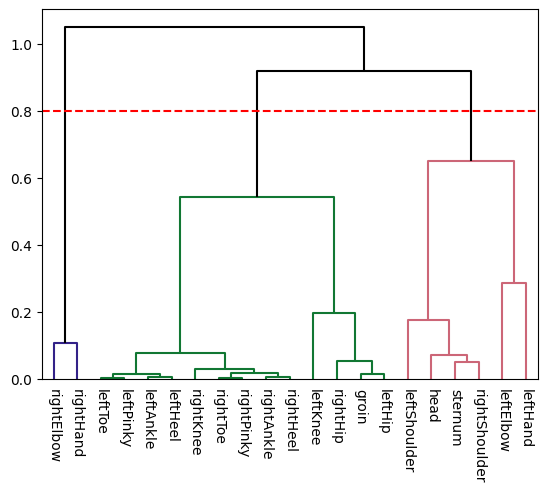

In [8]:
hierarchy.set_link_color_palette(['#332288', '#117733', '#cc6677', 'orchid', 'mediumorchid', 'fuchsia', 'thistle', 'violet', 'purple'])

vector_array = analysis_matrix_normed.to_numpy()
vector_array = vector_array.transpose()

keyPointLabels = ['head', 'sternum', 'rightShoulder', 'rightElbow', 'rightHand', 'leftShoulder', 'leftElbow', 'leftHand', 'groin', 'rightHip', 'rightKnee', 'rightAnkle', 'leftHip', 'leftKnee', 'leftAnkle', 'leftToe', 'leftPinky', 'leftHeel', 'rightToe', 'rightPinky', 'rightHeel']

linkage_data = linkage(vector_array, method='complete', metric='correlation')

dendrogram(linkage_data, color_threshold=0.8, labels=keyPointLabels, leaf_rotation=270, above_threshold_color='black')
plt.axhline(y = 0.8, color = 'r', linestyle = '--')
plt.savefig('/Users/vojtasmekal/Documents/dendrogram_allActions', bbox_inches='tight')

### Silhouette Analysis

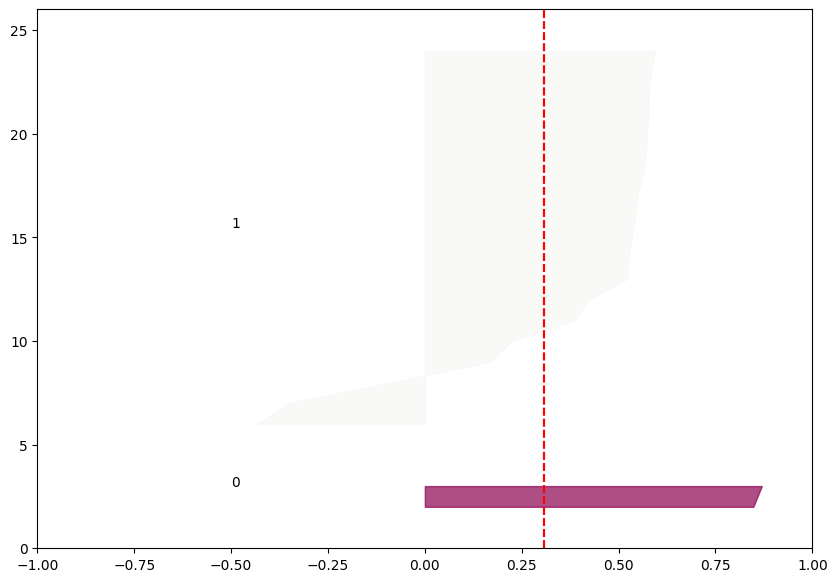

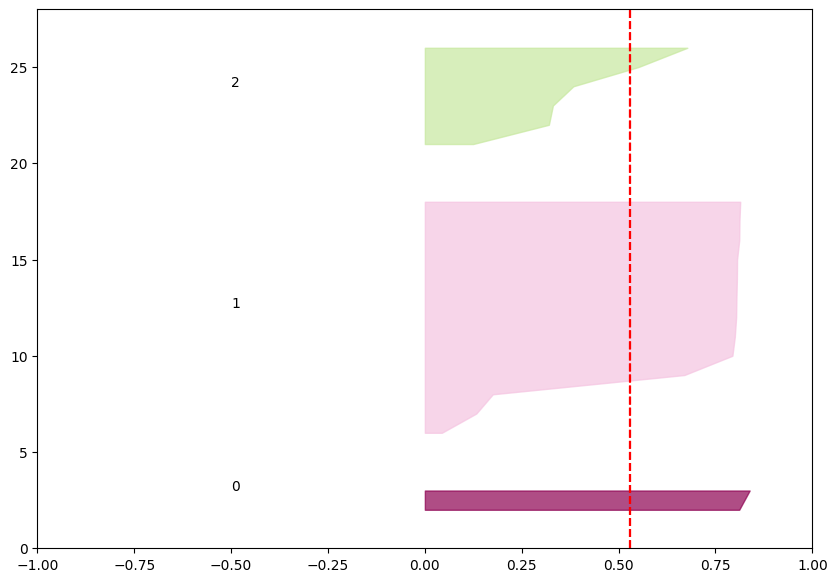

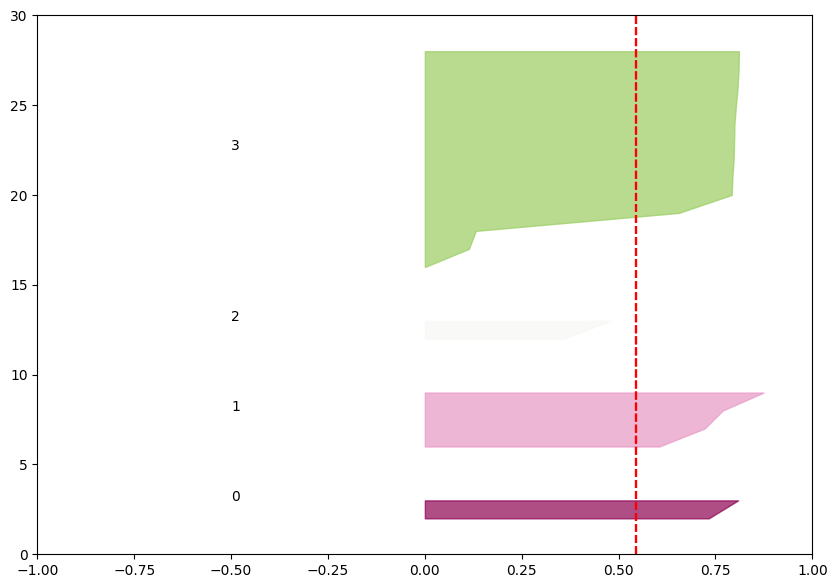

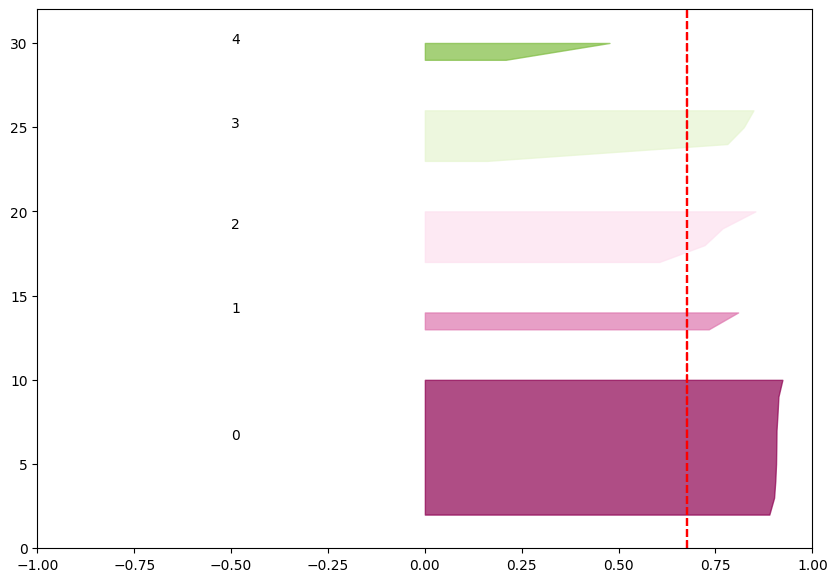

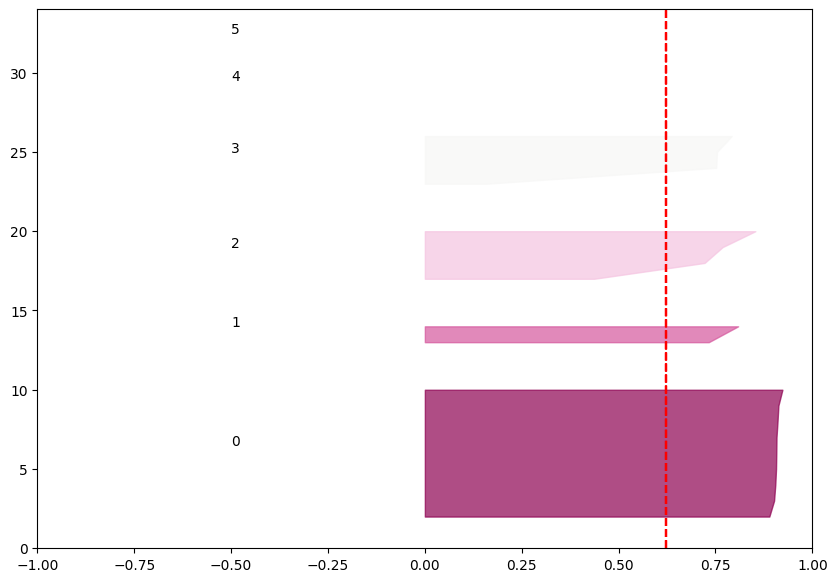

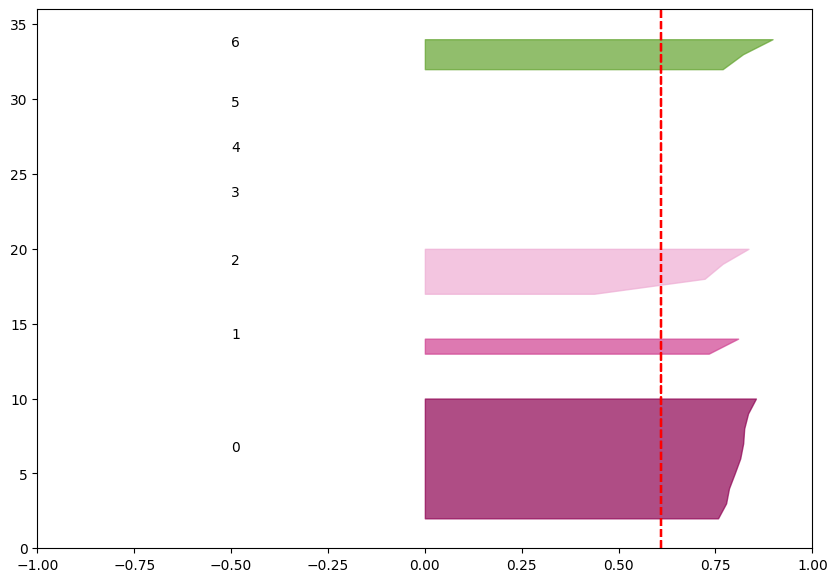

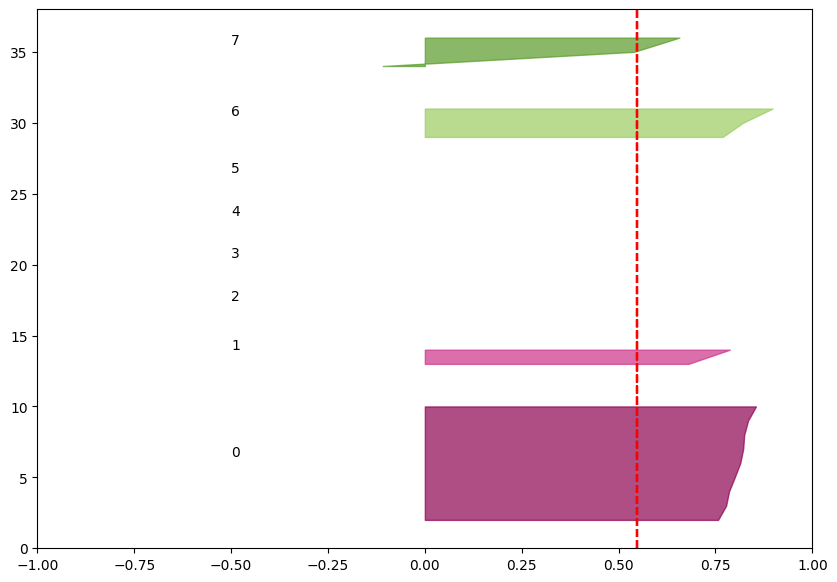

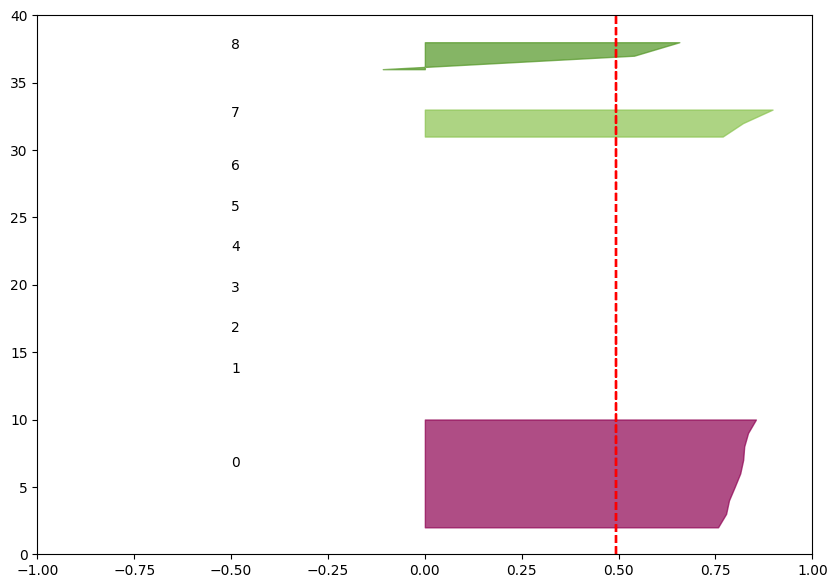

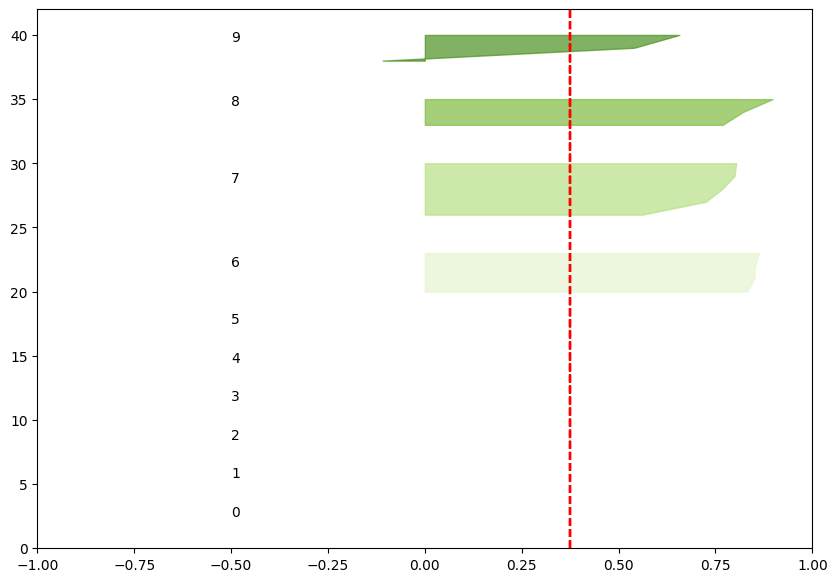

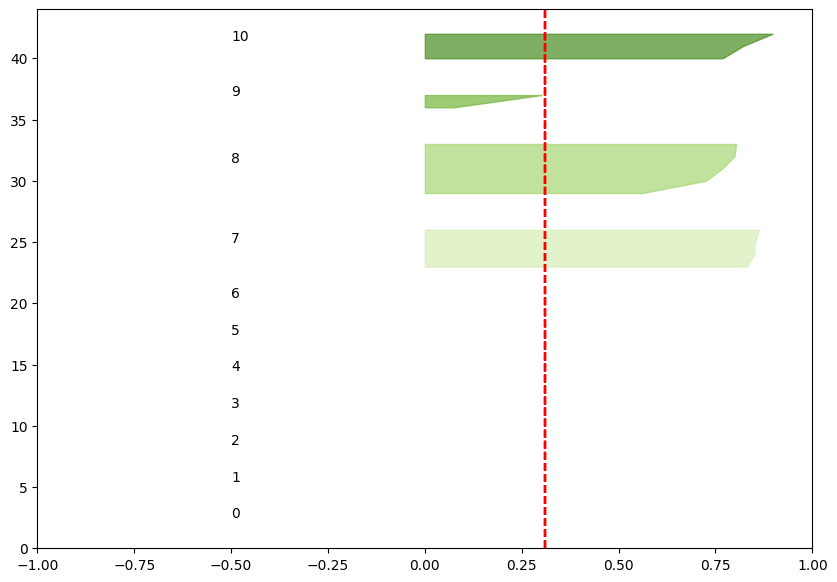

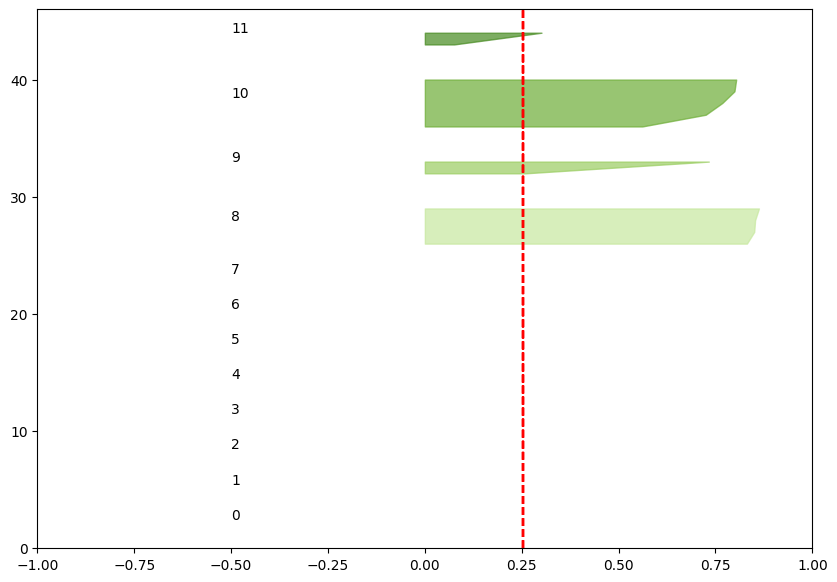

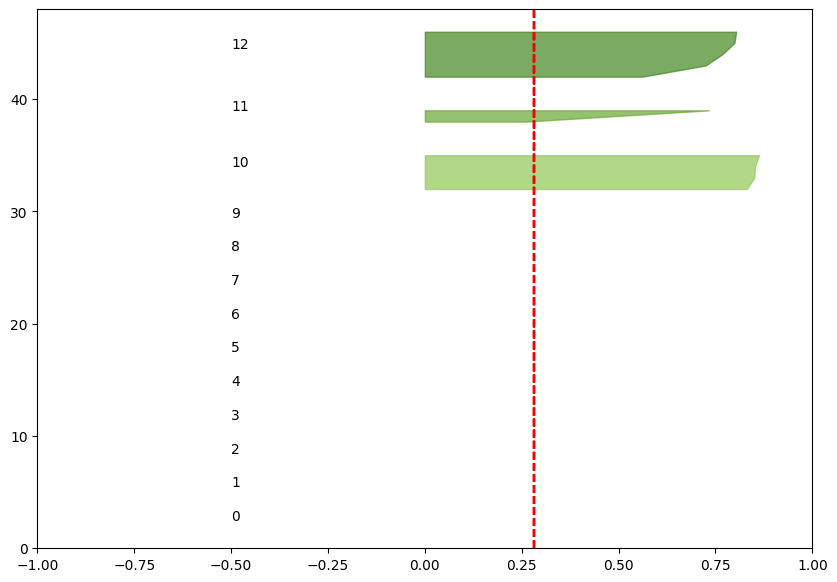

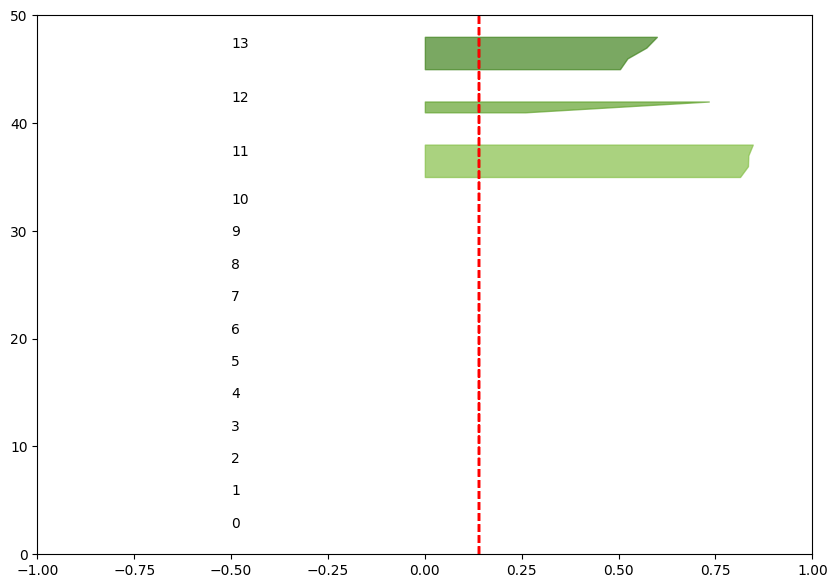

In [11]:
linkage_df = pd.DataFrame(linkage_data, columns = ['cluster1', 'cluster2', 'distance', 'n_new'])

range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(linkage_df) + (n_clusters + 1) * 2])
    
    cluster_dict = dict()
    
    for key in range(len(analysis_matrix_normed.T.index.tolist())):
        cluster_dict[key] = [key]
    n = max(cluster_dict.keys())
    
    for i in range(0, len(linkage_df)):
        new_cluster_id = n+i+1
        old_cluster_id_0 = linkage_df.loc[i, 'cluster1']
        old_cluster_id_1 = linkage_df.loc[i, 'cluster2']
        combined_ids = []
        if old_cluster_id_0 in cluster_dict:
            combined_ids = combined_ids + cluster_dict[old_cluster_id_0]
            del cluster_dict[old_cluster_id_0]
        else:
            combined_ids += [old_cluster_id_0]
        if old_cluster_id_1 in cluster_dict:
            combined_ids = combined_ids + cluster_dict[old_cluster_id_1]
            del cluster_dict[old_cluster_id_1]
        cluster_dict[new_cluster_id] = combined_ids
        if len(cluster_dict.keys()) == n_clusters:
            break
    
    labels = []
    
    keys = cluster_dict.keys()
    for key in keys:
        values = cluster_dict[key]
        for value in values:
            labels.append([value, key])
            
    labels.sort()
    for j in range(0, len(labels)):
        labels[j] = labels[j][1]
        
    clusterLabels = set(labels)
    
    analysis_array = np.asarray(analysis_matrix_normed).T
    corrMatrix = np.corrcoef(analysis_array.astype(float))
    corrMatrix = 1 - abs(corrMatrix)
    
    silhouette_avg = silhouette_score(corrMatrix, labels)
    
    sample_silhouette_values = silhouette_samples(corrMatrix, labels, metric="precomputed")
    silhouetteValues = np.array(sample_silhouette_values)
    
    y_lower = 2
    for k in range(n_clusters):
        clusterDefinition = np.empty([len(labels)])
        counter = 0
        for label in labels:
            if label == list(clusterLabels)[k]:
                clusterDefinition[counter] = 1
                counter += 1
            else:
                clusterDefinition[counter] = 0
                counter += 1
        ith_cluster_silhouette_values = sample_silhouette_values[clusterDefinition.T.astype(bool)]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.PiYG(float(k) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        ax1.text(-00.5, y_lower + 0.5 * size_cluster_i, str(k))
        
        y_lower = y_upper +2
        
        ax1.axvline(x=silhouette_avg, color = "red", linestyle="--")
        
    plt.savefig('/Users/vojtasmekal/Documents/SilhouetteAnalysis_allActions_{}'.format(n_clusters))
    


## Principal Component Analysis (PCA)

In [14]:
scaling = StandardScaler()
scaling.fit(analysis_matrix_normed)
scaled_data = scaling.transform(analysis_matrix_normed)

pca_result = PCA(n_components=10)
pca_result.fit(scaled_data)

expVariance = pca_result.explained_variance_ratio_
display(expVariance)

array([0.55491918, 0.23721221, 0.10252024, 0.03723556, 0.03463324,
       0.01150234, 0.00751475, 0.00353856, 0.0028475 , 0.00262263])

### Sparse PCA

In [15]:
class SparsePCA():
    """
    Class object that contains all code necessary to run the sparse PCA. The main method that calls the other methods is
    self.fit(). The logic is:
    1. Take the data matrix and compute the first principal component without constraints. (method: run_regular_pca_())
    2. Iteratively sparsify the component using gradient descent (method: sparsify_w())
    3. Remove the variance of the found component from the data matrix.

    Then repeat 1.-3. until all desired components are found.
    """
    def __init__(self, n_components, alpha=100, verbose=False):
        self.n_components = n_components
        self.alpha = alpha
        self.verbose = verbose
        self.explained_variance = None

    def run_regular_pca_(self, X):
        """
        Initializes a principal component without sparsity constraint
        Args:
            X: data matrix of shape (n, k)

        Returns: Principal component of shape (k)

        """

        u, s, vt = np.linalg.svd(X)
        v = np.squeeze(vt[0, :])
        if self.verbose:
            print(v @ np.cov(X.T) @ v)
            print("l1 norm of unconstrained component:", np.linalg.norm(v, 1))
        return v

    ### Methods for gradient calculation. Don't need to be called outside thise file!
    def abs(self, w):
        return w * np.tanh(self.alpha * w)

    def abs_prime(self, w):
        diag = np.tanh(self.alpha * w) + self.alpha * w * (1 - np.tanh(self.alpha * w) ** 2)
        return diag

    def u1(self, X, w):
        return w @ np.cov(X.T) @ w

    def u2(self, w):
        return - np.sum(self.abs(w))

    def v1(self, w):
        return np.linalg.norm(w) ** 2

    def v2(self, w):
        return np.linalg.norm(w) ** 2

    def u1_prime(self, X, w):
        u_prime = 2 * w.T @ np.cov(X.T)
        return u_prime

    def u2_prime(self, w):
        return - self.abs_prime(w)

    def v1_prime(self, w):
        return 2 * w

    def v2_prime(self, w):
        return 2 * w

    def compute_first_grad(self, X, w):
        enum = self.u1_prime(X, w) * self.v1(w) - self.u1(X, w) * self.v1_prime(w)
        denom = self.v1(w) ** 2
        return enum / denom

    def compute_reg_grad(self, w):
        enum = self.u2_prime(w) * self.v2(w) - self.u2(w) * self.v2_prime(w)
        denom = self.v2(w) ** 2
        grad = enum / denom
        return grad

    def compute_grad(self, X, w, lambd):
        grad = self.compute_first_grad(X, w) + lambd * self.compute_reg_grad(w)
        # Orthogonalize
        grad = grad - (np.dot(grad, w) / np.dot(w, w)) * w
        return grad

    def compute_loss(self, X, w, lambd):
        return self.u1(X, w) / self.v1(w) + lambd * self.u2(w) / self.v2(w)

    def sparsify_w(self, X, w, lambd, lr, steps):
        """
        Iteratively sparsifies a principal component w
        Args:
            X: Data matrix
            w: Starting point of the optimization. Should be an unconstrained PC
            lambd: hyperparameter
            lr: Learning rate
            steps: Number of steps of iteration

        Returns: The sparse principal component of shape (k)

        """
        if self.verbose == True:
            print("starting loss:", self.compute_loss(X, w, lambd))
        for step in range(steps):
            grad = self.compute_grad(X, w, lambd)
            w += lr * grad
            w = w / np.linalg.norm(w)
            if step % 1000 == 0 and self.verbose == True:
                print("step:", step)
                print("grad norm:", np.linalg.norm(grad))
                print("loss:", self.compute_loss(X, w, lambd))
                print("var loss:", self.u1(X, w) / self.v1(w), "reg loss:", lambd * self.u2(w) / self.v2(w))
                print()
        return w

    def find_component(self, X, lambd, lr, steps):
        """
        Finds the sparse principal component for a data matrix
        Args:
            X: Data matrix
            lambd: hyperparameter
            lr: Learning rate
            steps: Number of steps

        Returns: The sparse principal component of shape (k)

        """
        w = self.run_regular_pca_(X)
        w_out = self.sparsify_w(X, w, lambd, lr, steps)
        return w_out

    def remove_variance(self, X, w):
        """
        Remove the component variance from the data to prepare matrix to find the next component
        Args:
            X: Data matrix used to compute w
            w: First principal component of matrix X

        Returns: The data matrix with variance removed. Shape is same as X

        """
        X = X - X @ np.outer(w, w)
        return X

    def fit(self, X, lambdas, lr=1e-6, steps=1000):
        """
        Finds all sparse principal components in one run.
        Args:
            X: Data matrix
            lambdas: Int or List of length self.n_components containing where entry i is hyperparameter for component i
            lr: Learning rate
            steps: Number of steps to be used

        Returns: Matrix where the i-th column contains the i-th sparse PC

        """
        # Keep track of the original X
        X_original = np.copy(X)
        if not isinstance(lambdas, list):
            lambdas = self.n_components * [lambdas]
        # Initialize component matrix
        W = np.zeros((X.shape[1], self.n_components))
        # Loop over number of desired components
        for component_id in range(self.n_components):
            #print("Computing component", component_id, "...")
            w = self.find_component(X, lambdas[component_id], lr, steps)
            W[:, component_id] = w
            # Remove the variance of the found component from the data to find the next one
            X = self.remove_variance(X, w)
        # Compute explained variance
        self.compute_explained_variance(X_original, W)
        return W

    def compute_explained_variance(self, X, W):
        """
        Computes the explained variance (done automatically after fitting)
        Args:
            X: Data matrix
            W: Matrix containing the principal components (n_features, n_components)

        Returns: nd.array where entry i is the ratio of explained variance of component i

        """
        self.explained_variance = np.diag(W.T @ np.cov(X.T) @ W) / np.trace(np.cov(X.T))
        return None


In [29]:
X = analysis_matrix_normed.to_numpy(copy=True)

X -= np.mean(X.astype(float), axis=0)

n_components = 3
lambdas = [250, 450, 600]

lr = 1e-6
steps = 10000
alpha = 100

sparse_pca = SparsePCA(n_components=n_components, alpha=alpha)

W = sparse_pca.fit(X.astype(float), lambdas=lambdas)
df = pd.DataFrame(W)

print("Explained variance:", sparse_pca.explained_variance)
print("Total explained variance:", np.sum(sparse_pca.explained_variance))
print("L1 norm of components:", np.linalg.norm(W, ord=1, axis=0))

display(df)

Explained variance: [0.40011953 0.28650308 0.10007084]
Total explained variance: 0.7866934563972814
L1 norm of components: [3.42359831 3.04496766 1.9528576 ]


,0,1,2
0,-5.029666e-01,2.199282e-07,7.347678e-08
1,-2.656979e-01,7.055669e-08,8.418379e-08
2,-3.078555e-01,1.457372e-07,5.097396e-08
3,-3.894861e-01,1.960795e-07,-7.878712e-08
4,-4.594685e-01,3.502468e-01,-5.329914e-01
5,-1.683945e-01,2.432281e-08,3.039096e-01
6,-2.837474e-07,-4.719352e-08,5.789579e-01
7,-5.459404e-02,-5.284416e-09,5.369981e-01
8,-6.748473e-07,-9.383850e-08,6.783037e-08
9,-1.031529e-06,-7.218725e-08,6.111140e-08


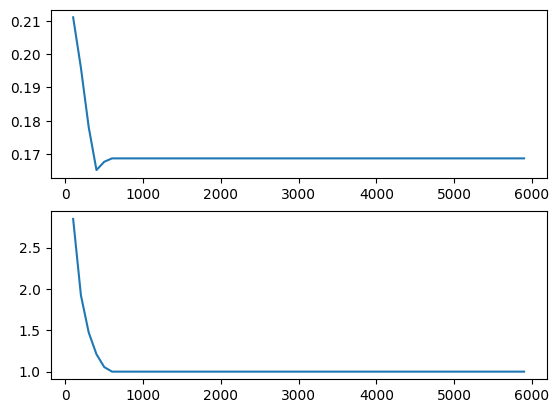

In [19]:
expVars = []
l1norms = []
hyperparameter = []

for i in range(100, 6000, 100):
    lambdas = [100, i]
    
    W = sparse_pca.fit(X.astype(float), lambdas = lambdas)
    expVar = sparse_pca.explained_variance
    l1norm = np.linalg.norm(W, ord=1, axis=0)
    
    expVars.append(expVar[1])
    l1norms.append(l1norm[1])
    hyperparameter.append(i)
    
figure, axis = plt.subplots(2, 1)

axis[0].plot(hyperparameter, expVars)
axis[1].plot(hyperparameter, l1norms)
plt.show()

## Feature Definition

In [52]:
hc_hands = [4, 6, 7]
hc_rest = [0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

pc_1 = [0, 1, 2, 3, 5, 6, 7, 8, 9, 12]
pc_2 = [2, 3, 6, 7, 9]
pc_3 = [3, 4, 10, 15, 19]

body_regions = [hc_hands, hc_rest, pc_1, pc_2, pc_3]
body_regions_names = ["hc_hands", "hc_rest", "pc_1", "pc_2", "pc_3"]

all_stimuli_region_averages_df = pd.DataFrame(index=body_regions_names)

analysis_matrix_normed['actor'] = analysis_matrix['actor']
actors = analysis_matrix_normed['actor'].unique()

for actor in actors:
    df = analysis_matrix_normed.loc[analysis_matrix_normed['actor'] == actor]
    
    for region, region_name in zip(body_regions, body_regions_names):
        all_stimuli_region_averages_df.loc[region_name, actor]= np.mean(df.iloc[:, region])
        
display(all_stimuli_region_averages_df.T)
#all_stimuli_region_averages_df.T.to_excel("/Users/vojtasmekal/Documents/output/N4_allActions_features.xlsx")
#all_stimuli_region_averages_df.T.to_excel("/Volumes/My Passport/Macbook_Documents_29052024/UNIVERSITY/Maastricht/git/output/{}_features_v4.xlsx".format(action))

,hc_hands,hc_rest,pc_1,pc_2,pc_3
M8_,0.915078,1.023875,1.011386,0.982645,0.980443
M10,0.985831,1.024246,1.011945,1.010254,1.025129
M7_,1.047244,1.045918,1.081278,1.077918,1.030854
M9_,1.041488,0.993690,0.960950,0.989547,1.047417
M5_,1.004861,0.981454,0.988185,0.983856,0.972126
M6_,1.002144,0.930381,0.945624,0.954170,0.942091


In [19]:
keyPoints = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

indvKeyPoint_averages_df = pd.DataFrame(columns=keyPoints)

analysis_matrix_normed['actor'] = vectors_heightControlled['actor']
analysis_matrix_normed['action'] = vectors_heightControlled['action']
actors = analysis_matrix_normed['actor'].unique()
actions = analysis_matrix_normed['action'].unique()

for actor in actors:
    for action in actions:
        df = analysis_matrix_normed.loc[(analysis_matrix_normed['actor'] == actor) & (analysis_matrix_normed['action'] == action)]
        stimName = action + "_" + actor
        
        for kp in keyPoints:
            indvKeyPoint_averages_df.loc[stimName, kp] = np.mean(df.iloc[:, kp])
            
        
display(indvKeyPoint_averages_df)
indvKeyPoint_averages_df.to_csv('/Users/vojtasmekal/Documents/output/individual_keyPoint_vectors_normed.csv')

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
N4_M9_,1.088353,1.060596,1.102072,1.188896,1.28564,1.038902,1.016657,1.095596,1.031486,1.043857,...,0.879285,1.03993,1.00848,0.899627,0.905612,0.914568,0.888421,0.909444,0.914572,0.891457
E3_M9_,0.822903,0.926381,0.897828,0.956605,0.980619,0.9551,1.003934,1.040604,0.990615,0.983047,...,1.040129,0.996665,1.014551,1.018422,1.032282,1.030705,1.017577,1.045808,1.038371,1.043391
E2_M9_,1.000125,1.016728,0.989314,0.904008,0.815305,1.039219,1.080743,1.169451,1.049148,1.042232,...,1.080166,1.053145,1.043266,1.040281,1.048045,1.044755,1.033809,1.097269,1.095024,1.078412
N1_M9_,1.042779,1.028752,1.0243,1.118879,1.219586,1.023438,1.011059,1.060551,1.049603,1.054828,...,1.104811,1.043004,1.054438,1.085807,1.082649,1.086071,1.085817,1.104692,1.111088,1.107269
E1_M9_,0.759853,0.83433,0.869915,1.007934,1.109274,0.812752,0.878055,0.961126,0.976838,0.992129,...,1.017551,0.970803,1.015227,1.055847,1.061209,1.057955,1.061282,1.018299,1.024306,1.012174
N2_M9_,1.012581,1.017511,0.985246,0.961704,0.946925,1.021134,1.039287,0.926775,1.034437,1.029535,...,1.087075,1.039562,1.048236,1.078979,1.06793,1.070995,1.077168,1.076779,1.076063,1.096631
N4_M8_,0.989363,0.997738,1.003627,1.032012,1.046484,1.013087,1.0545,1.138735,0.988517,0.988416,...,0.865714,0.986272,1.021283,0.92545,0.913958,0.92363,0.937127,0.869362,0.865396,0.860464
E3_M8_,0.930349,0.988504,0.967328,0.993158,0.994488,1.008105,1.008898,0.962824,1.00121,0.989841,...,1.016034,1.008709,0.999648,1.018771,1.012279,1.019288,1.015253,1.006851,1.006756,1.014251
E2_M8_,0.983693,0.966426,0.947743,1.009733,0.998934,0.977462,0.9915,1.052602,1.011224,1.011678,...,1.06357,1.010941,1.023928,1.04407,1.04938,1.044256,1.041981,1.057551,1.059542,1.05728
N1_M8_,1.081113,1.008874,1.020628,1.093968,1.201663,0.998341,0.997144,1.04221,0.995299,1.000951,...,1.051292,1.000933,1.014719,1.025544,1.042318,1.047409,1.033094,1.05844,1.059621,1.060236


In [64]:
from scipy.spatial import distance_matrix

matrix = all_stimuli_region_averages_df.T['pc_3'].to_numpy()
display(matrix.T)

distMatrix = distance_matrix(matrix.T, matrix.T)


array([0.98044296, 1.02512862, 1.03085422, 1.04741696, 0.97212621,
       0.94209056])

ValueError: not enough values to unpack (expected 2, got 1)